Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.sample(10)

,FILM,STARS,RATING,VOTES
32,Southpaw (2015),5.0,4.6,5597
463,La leon (2015),0.0,0.0,0
99,American Ultra (2015),4.0,3.7,638
143,Maggie (2015),3.5,3.3,95
422,A Midsummer Night's Dream (2015),5.0,5.0,1
16,Magic Mike XXL (2015),4.5,4.4,9363
28,Ted 2 (2015),4.5,4.1,6437
374,The Girl is in Trouble (2015),4.5,4.3,3
471,Melody (2015),0.0,0.0,0
25,Annie (2014),4.5,4.2,6835


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


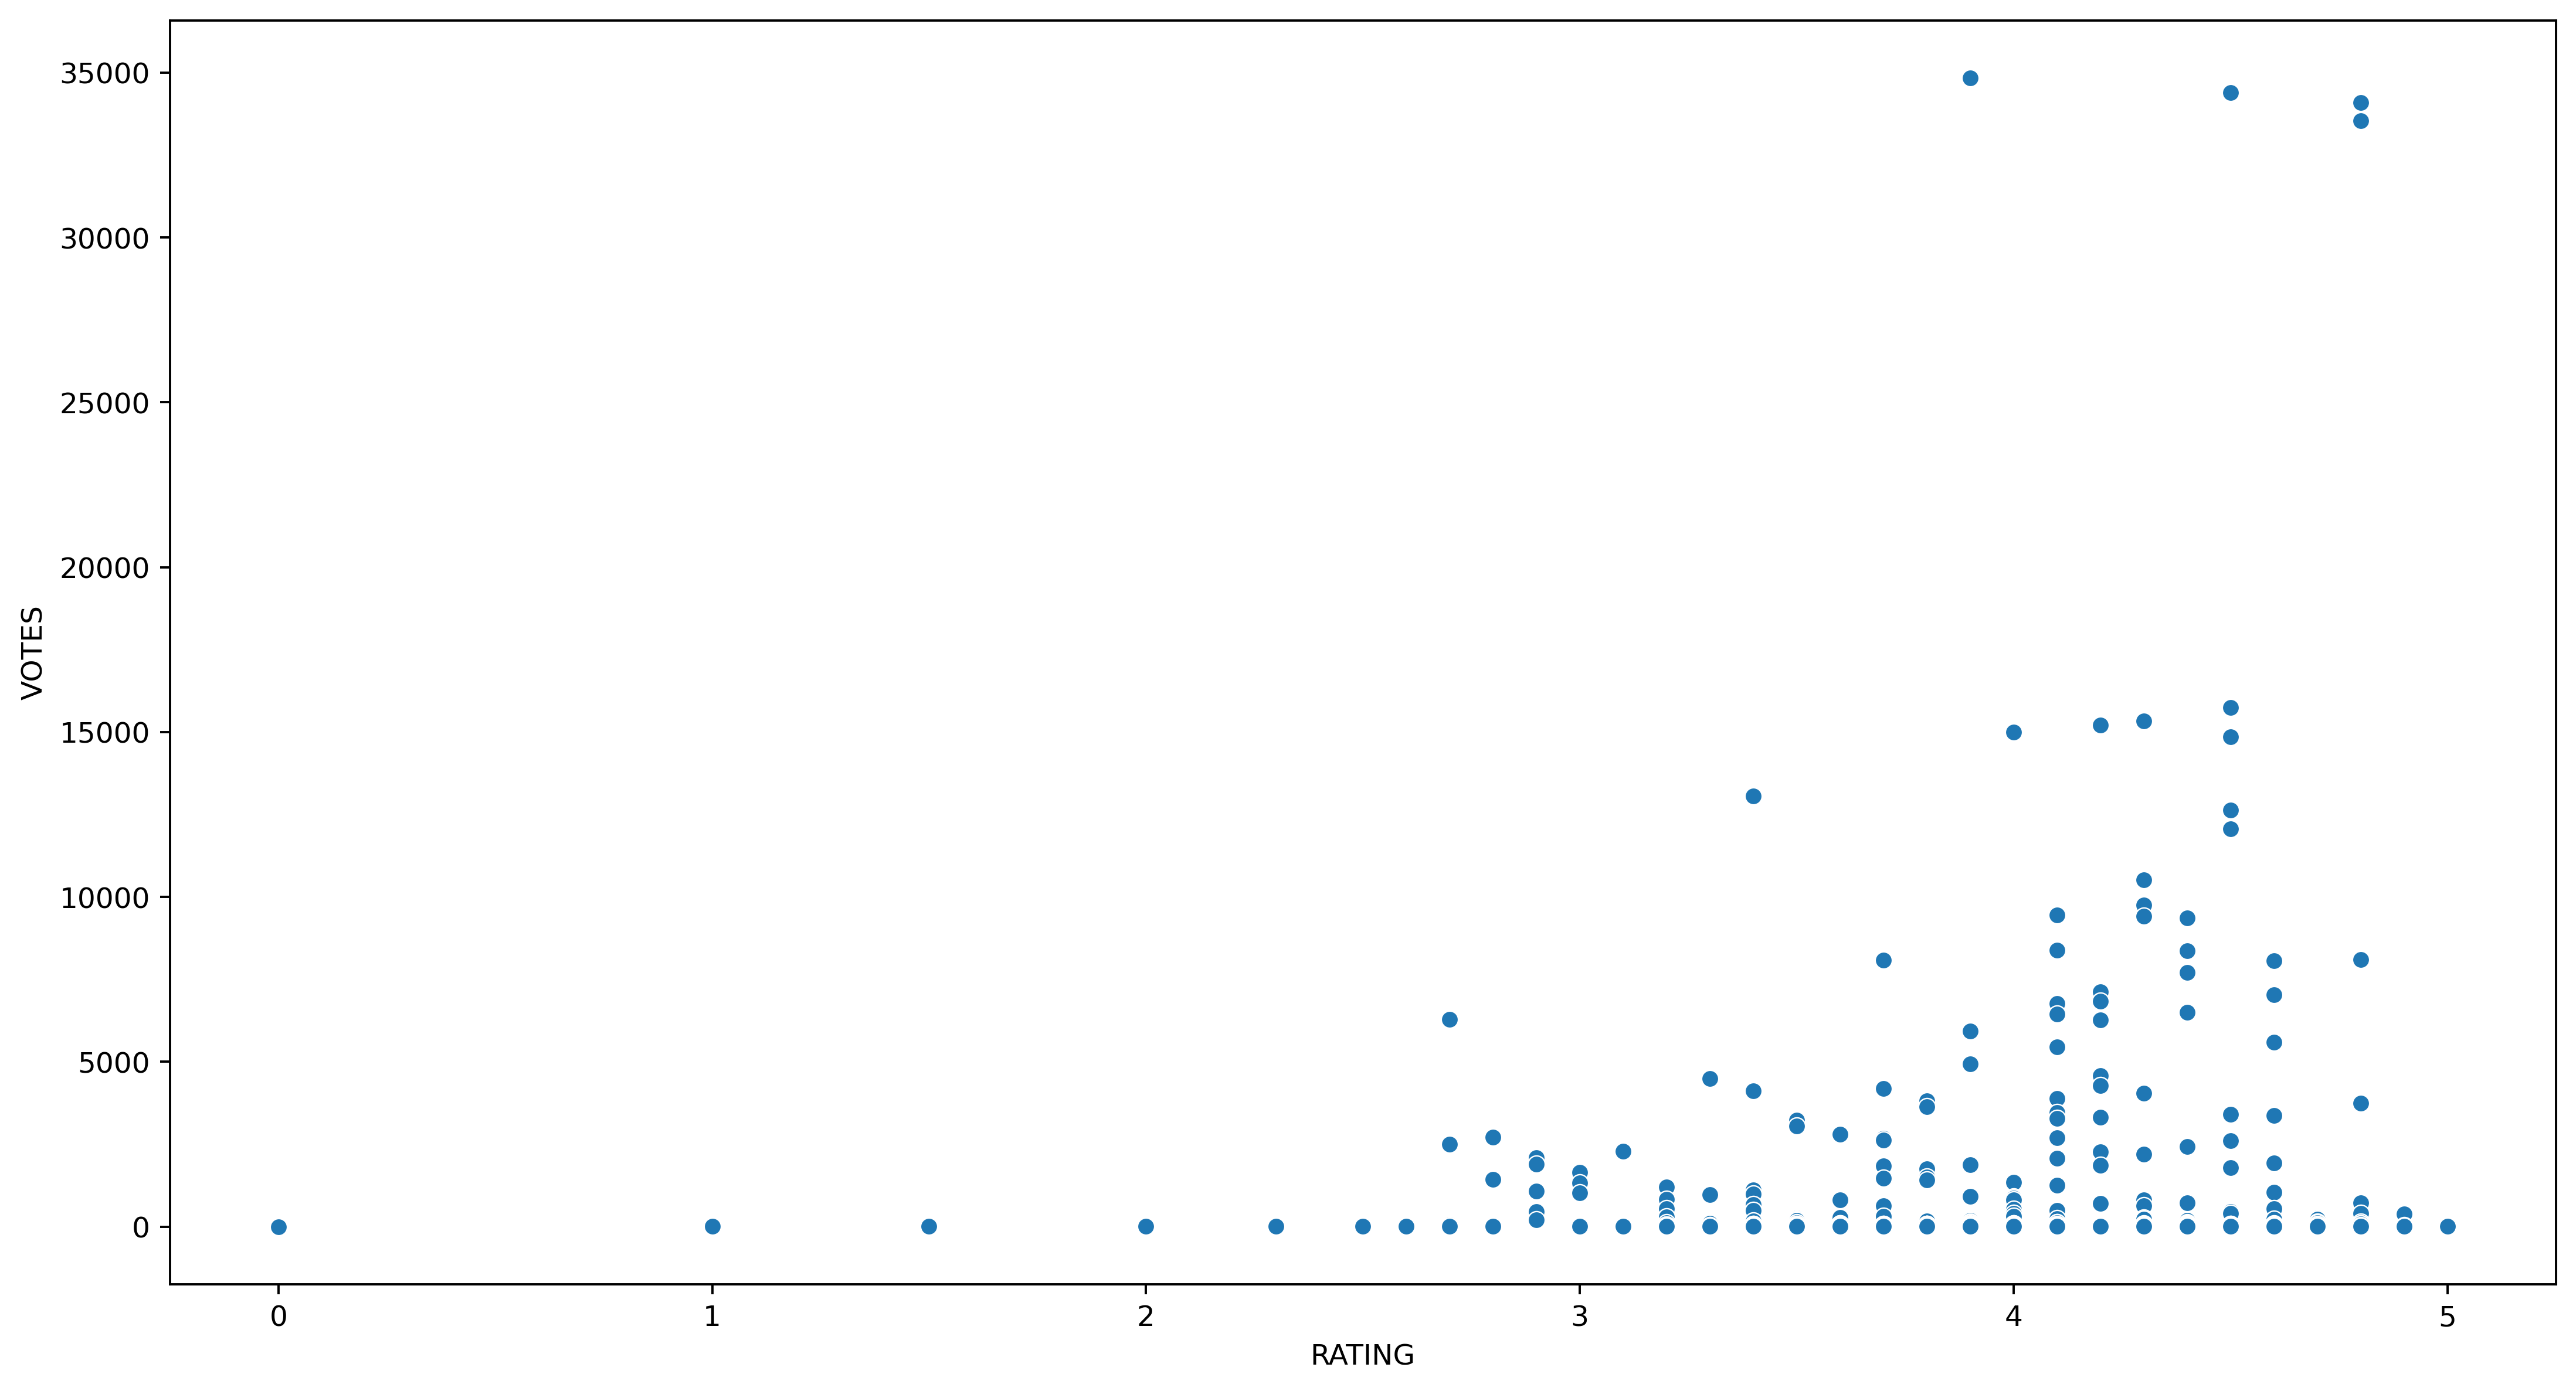

In [6]:
plt.figure(figsize=(15, 8), dpi=350)
sns.scatterplot(x='RATING', y='VOTES', data=fandango);

График зависимости между величинами рейтинг и количество голосов. Можно сделать вывод, что наибольшее число оценок имеют фильмы с рейтингом в диапазоне от 3 до 5. Также, у фильмов с довольно высоким рейтингом можно наблюдать выбросы.

**Вычислим корреляцию между колонками:**

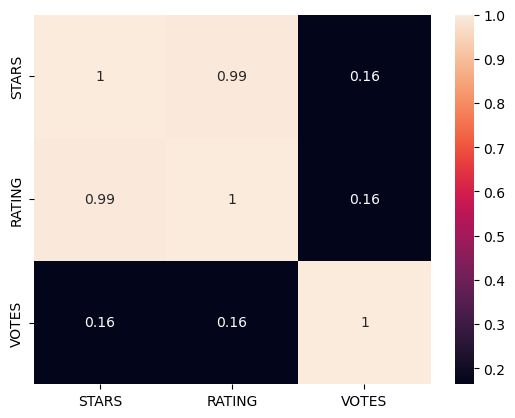

In [7]:
sns.heatmap(fandango.corr(), annot=True);

Количество голосов не очень сильно коррелирует с рейтингом.

**Каждая строка в колонке FILM содержит значение в следующем формате:**

    Название Фильма (Год)
    
**Создадим новую колонку, в ней возьмем из строки FILM только год**

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda x: x.split()[-1].replace('(', '').replace(')', ''))

In [9]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Вычислим, сколько фильмов содержится в наборе данных Fandango в разбивке по годам:**

In [10]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Визуализируем количество фильмов в год с помощью графика:**

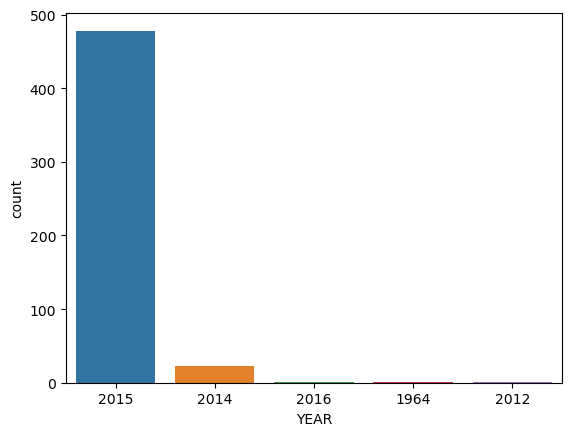

In [11]:
sns.countplot(x='YEAR', data=fandango);

**Взглянем, какие 10 фильмов получили наибольшее количество голосов**

In [12]:
fandango.sort_values('VOTES', ascending=False)[0:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Сколько фильмов имеет нулевое количество голосов:**

In [13]:
len(fandango[fandango['VOTES'] == 0])

69

**Создадим DataFrame только с теми фильмами, которые имеют голоса.**

In [14]:
fandango = fandango[fandango['VOTES'] != 0]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**Из-за особенностей отображения рейтингов в виде звёзд на страницах, истинные рейтинги пользователей могут немного отличаться от тех рейтингов, которые показывают пользователям. Визуализируем эту разницу распределений.**

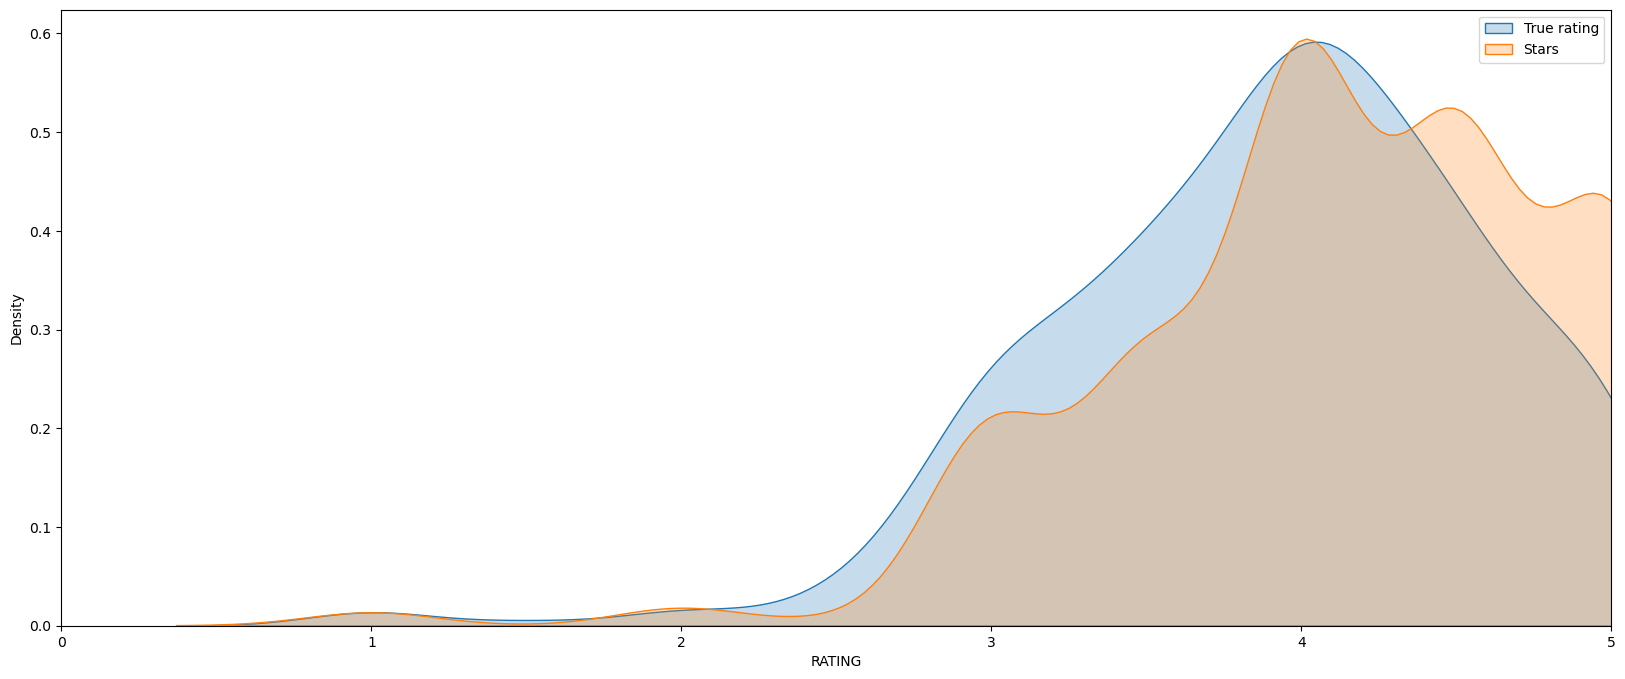

In [15]:
plt.figure(figsize=(20, 8))
sns.kdeplot(data=fandango['RATING'], shade=True, label='True rating')
sns.kdeplot(data=fandango['STARS'], shade=True, label='Stars')
plt.xlim(0, 5)
plt.legend();

**Можно увидеть, что распределение истинного рейтинга более смещено в сторону меньшего рейтинга.**

**Теперь посчитаем эту разницу в численном виде.**

In [16]:
fandango['DEV'] = np.round(fandango['STARS'] - fandango['RATING'], 1)

In [17]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,DEV
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Нарисуем график count plot для отображения того, сколько раз встречается то или иное значение разницы между STAR и RATING:**

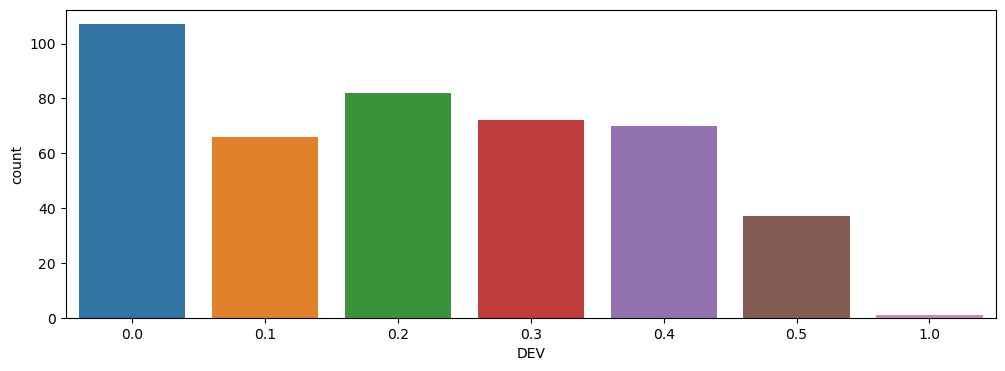

In [18]:
plt.figure(figsize=(12, 4))
sns.countplot(x='DEV', data=fandango);

**Разница в единицу встречается редко.**

**Этот фильм 1, найдём его:**

In [19]:
fandango[fandango['DEV'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,DEV
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


##  Сравнение рейтингов Fandango с рейтингами других компаний

Посмотрим, как рейтинги Fandango соотносятся с рейтингами других компаний.

In [20]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [21]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [23]:
all_sites.describe().T

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


### Рейтинги от Rotten Tomatoes

Здесь два набора рейтингов - рейтинги, опубликованные официальными критиками, и пользовательские рейтинги. 

**Выведем график зависимости между рейтингом критиков и пользовательским рейтингом для Rotten Tomatoes:**

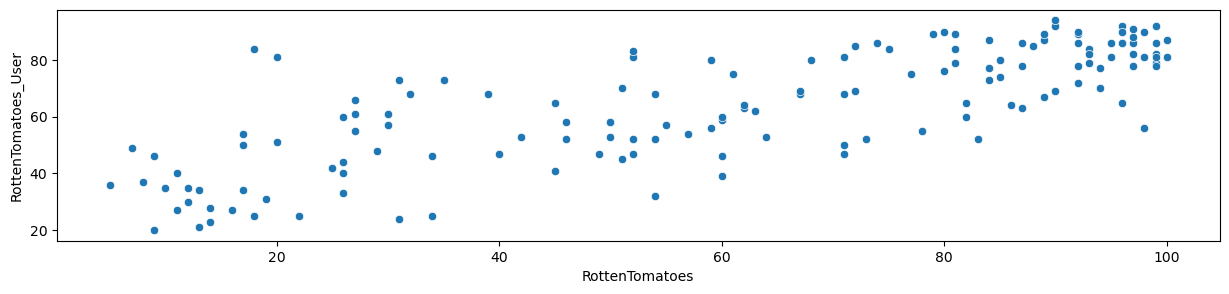

In [24]:
plt.figure(figsize=(15, 3))
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites);

Давайте изучим численную разницу между этими двумя рейтингами. Близкие к нулю значения говорят о том, что критики и пользователи согласны друг с другом. Большие положительные значения - когда критики оценили фильм намного выше, чем пользователи. А большие отрицательные значения - наоборот, пользователи оценили фильм намного выше, чем критики.

In [25]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [26]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Теперь давайте посчитаем среднее значение полученной разницы по всему набору данных.

In [27]:
np.abs(all_sites['Rotten_Diff']).mean()

15.095890410958905

**Нарисуем график распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes**

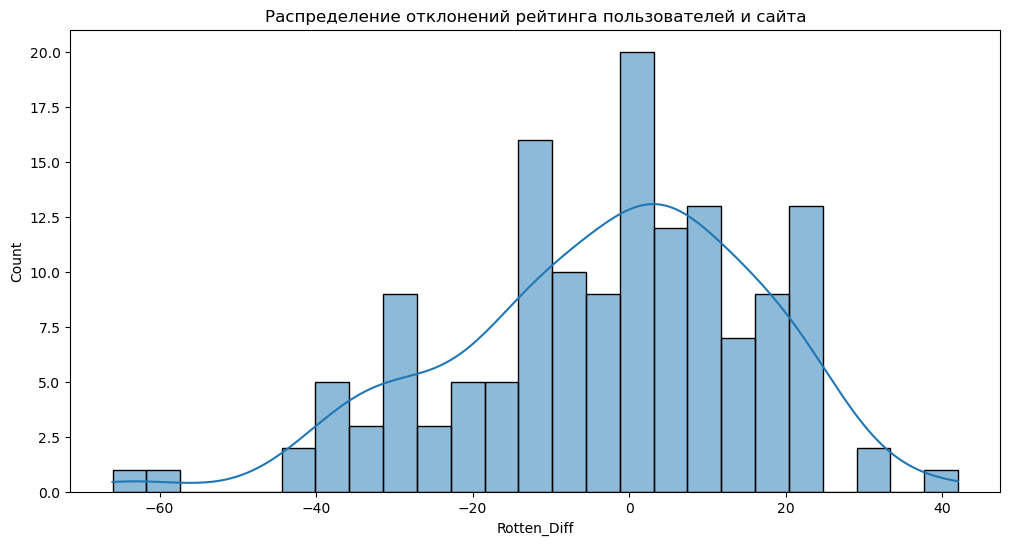

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Rotten_Diff', kde=True, data=all_sites, bins=25)
plt.title('Распределение отклонений рейтинга пользователей и сайта');

**Далее нарисуем график распределения модулей этих разностей.**

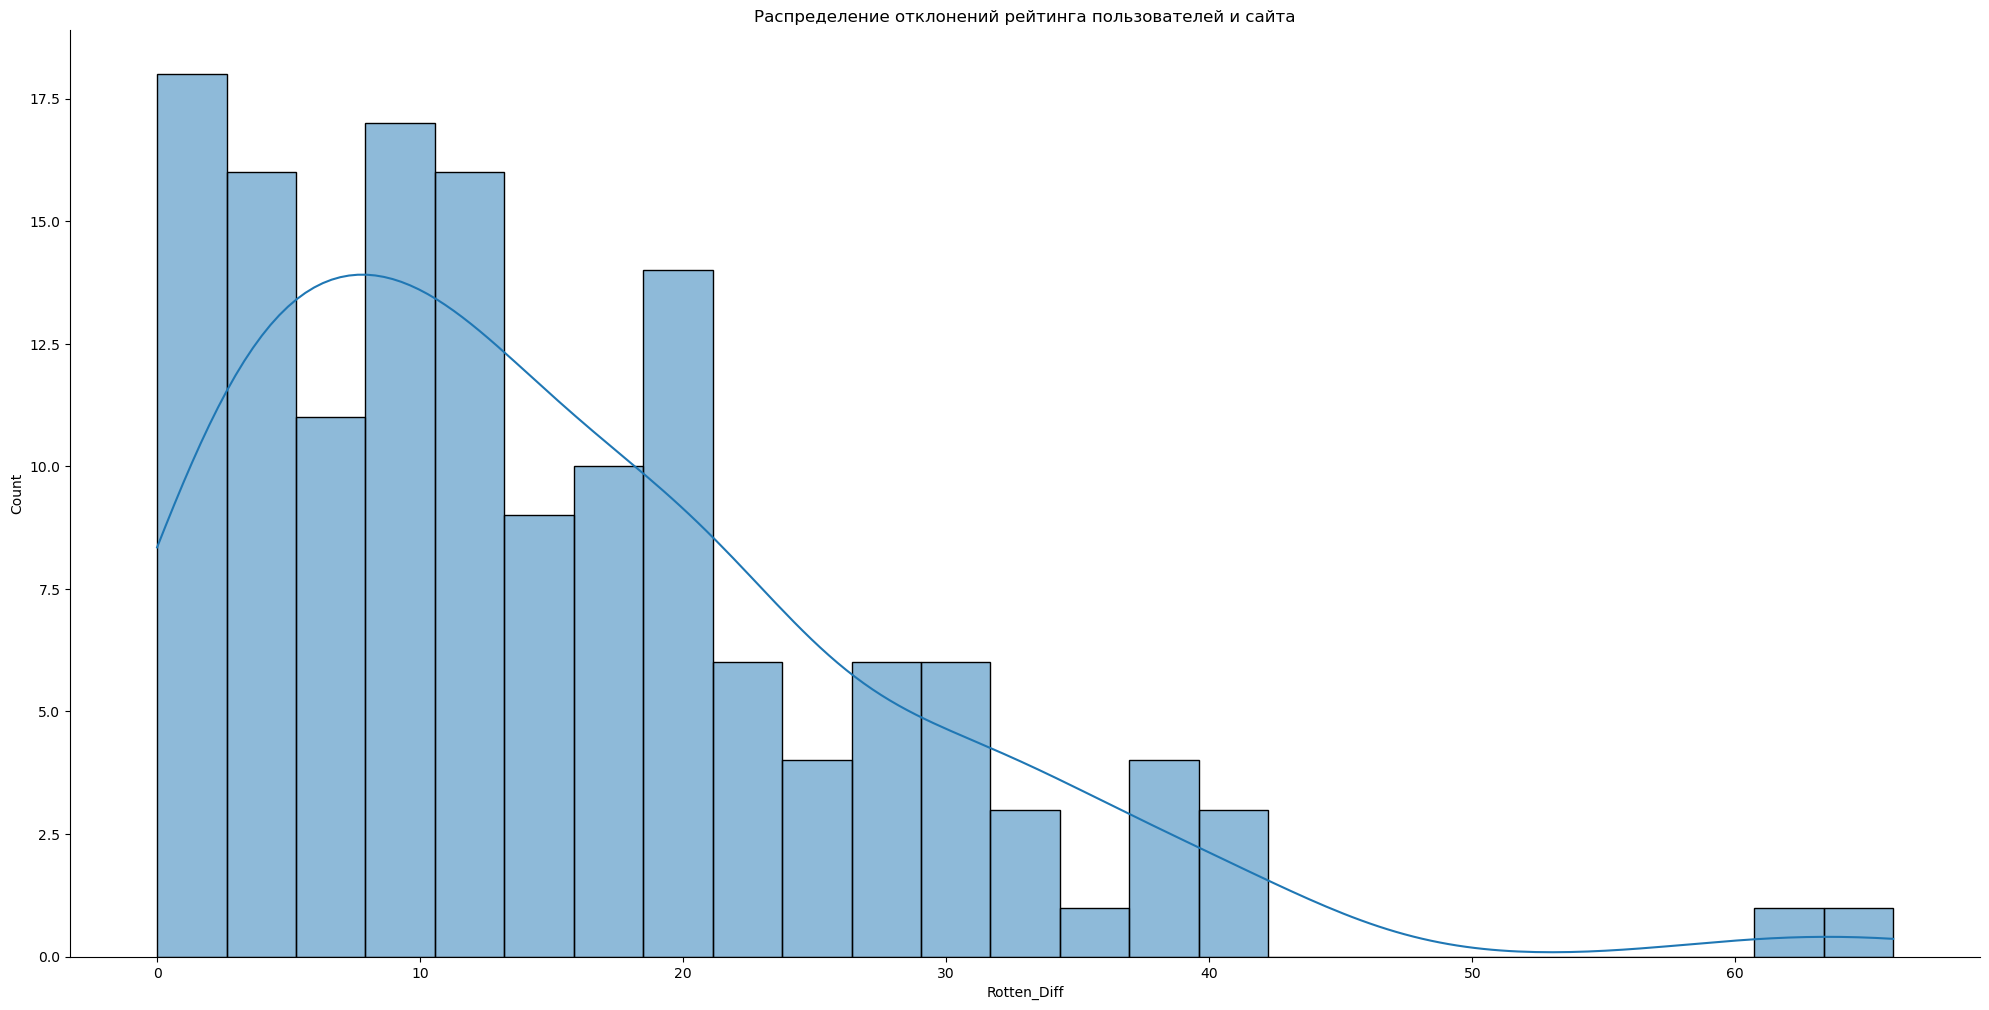

In [29]:
sns.displot(kde=True, data=np.abs(all_sites['Rotten_Diff']), bins=25, aspect=2, height=10)
plt.title('Распределение отклонений рейтинга пользователей и сайта');

**Выясним, какие фильмы наиболее отличаются по рейтингам. Сначала выведем 5 фильмов с наибольшей по модулю *отрицательной* разницей рейтингов.**

In [30]:
sorted_diff = all_sites[['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff')

In [31]:
print('Users Love but Critics Hate')
sorted_diff[:5]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Отобразим 5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей.**

In [32]:
sorted_diff_ = all_sites[['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff', ascending=False)
print('Critics love, but Users Hate')
sorted_diff_[:5]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Рейтинги от MetaCritic

Далее давайте взглянем на рейтинги от MetaCritic. Они тоже отображают два типа рейтингов - как свои официальные рейтинги, так и пользовательские рейтинги.

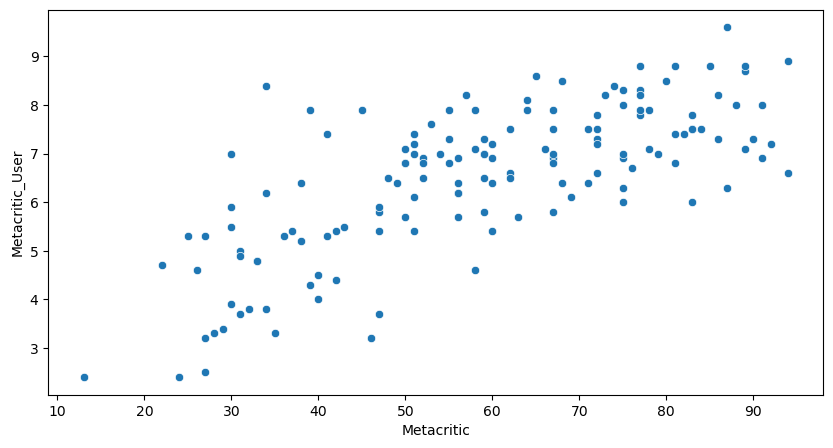

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites);

## Рейтинги от IMDB

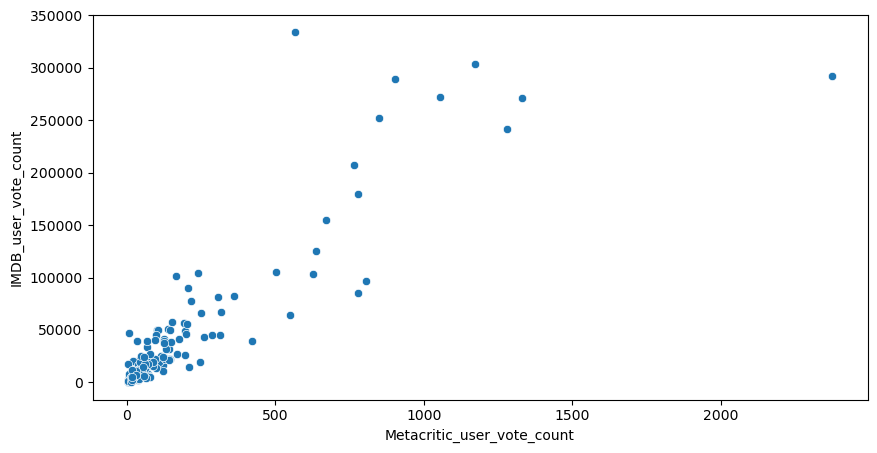

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites);

**Здесь мы видим выбросы - точки, очень сильно отличающиеся от всех других точек. Один фильм получил наибольшее количество голосов на IMDB, но только 500 голосов на Metacritic. Найдем этот фильм**

In [35]:
all_sites[(all_sites['IMDB_user_vote_count'] > 3.0e5) & (all_sites['Metacritic_user_vote_count'] < 600)]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Какой фильм получил наибольшее количество голосов на Metacritic?**

In [36]:
all_sites[all_sites["Metacritic_user_vote_count"] == all_sites["Metacritic_user_vote_count"].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Сравнение рейтингов Fandango с рейтингами других компаний

Выясним, являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов.

**Смёрджим таблицу fandango с таблицей all_sites, чтобы найти фильмы, присутсвующие на других сайтах.**

In [37]:
all_ = pd.merge(all_sites, fandango, how='inner', on='FILM')
all_

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR,DEV
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,5.0,4.5,14846,2015,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0,4.5,12640,2015,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,5.0,4.5,12055,2015,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,5.0,4.5,1793,2015,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,3.5,3.0,1021,2015,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,4.0,4.0,1348,2015,0.0
141,'71 (2015),97,82,83,7.5,7.2,60,24116,15,3.5,3.5,192,2015,0.0
142,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,3.5,3.5,118,2014,0.0
143,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,3.5,3.5,59,2015,0.0


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

Компании Rotten Tomatoes, Metacritic и IMDB используют другую шкалу измерения рейтингов, чем шкала от 0 до 5 звезд в Fandango. Чтобы выполнить сравнения, нам нужно *нормализовать* эти значения, чтобы они попадали с диапазон от 0 до 5 звёзд.

In [38]:
all_['RT_normed'] = all_['RottenTomatoes'] / 20

In [39]:
all_['RTU_normed'] = all_['RottenTomatoes_User'] / 20

In [40]:
all_['meta_normed'] = all_['Metacritic'] / 20

In [41]:
all_['meta_u_norm'] = all_['Metacritic_User'] / 2

In [42]:
all_['IMDB_normed'] = all_['IMDB'] / 2

In [43]:
all_.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,STARS,RATING,VOTES,YEAR,DEV,RT_normed,RTU_normed,meta_normed,meta_u_norm,IMDB_normed
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,62,12227,17,4.5,4.0,896,2015,0.5,4.95,4.10,4.05,4.40,3.70
100,Jupiter Ascending (2015),26,40,40,4.5,5.5,503,105412,-14,3.5,3.4,4122,2015,0.1,1.30,2.00,2.00,2.25,2.75
47,Annie (2014),27,61,33,4.8,5.2,108,19222,-34,4.5,4.2,6835,2014,0.3,1.35,3.05,1.65,2.40,2.60
78,Chappie (2015),30,57,41,7.4,7.0,637,125088,-27,4.0,3.8,3642,2015,0.2,1.50,2.85,2.05,3.70,3.50
130,Minions (2015),54,52,56,5.7,6.7,204,55895,2,4.0,4.0,14998,2015,0.0,2.70,2.60,2.80,2.85,3.35


In [44]:
norm_scores = all_[['STARS', 'RATING',
        'RT_normed', 'RTU_normed', 'meta_normed', 'meta_u_norm',
       'IMDB_normed']]

In [45]:
all_.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_Diff', 'STARS', 'RATING', 'VOTES',
       'YEAR', 'DEV', 'RT_normed', 'RTU_normed', 'meta_normed', 'meta_u_norm',
       'IMDB_normed'],
      dtype='object')

In [46]:
norm_scores.head()

,STARS,RATING,RT_normed,RTU_normed,meta_normed,meta_u_norm,IMDB_normed
0,5.0,4.5,3.70,4.3,3.30,3.55,3.90
1,5.0,4.5,4.25,4.0,3.35,3.75,3.55
2,5.0,4.5,4.00,4.5,3.20,4.05,3.90
3,5.0,4.5,0.90,4.2,1.10,2.35,2.70
4,3.5,3.0,0.70,1.4,1.45,1.70,2.55


### Сравнение распределений рейтингов от разных компаний


Действильно ли Fandango показывал неоправданно высокие рейтинги? Мы уже знаем, что отображаемые значения RATING были выше значений STARS. Но являются ли сами рейтинги в среднем более высокими, чем у других компаний?

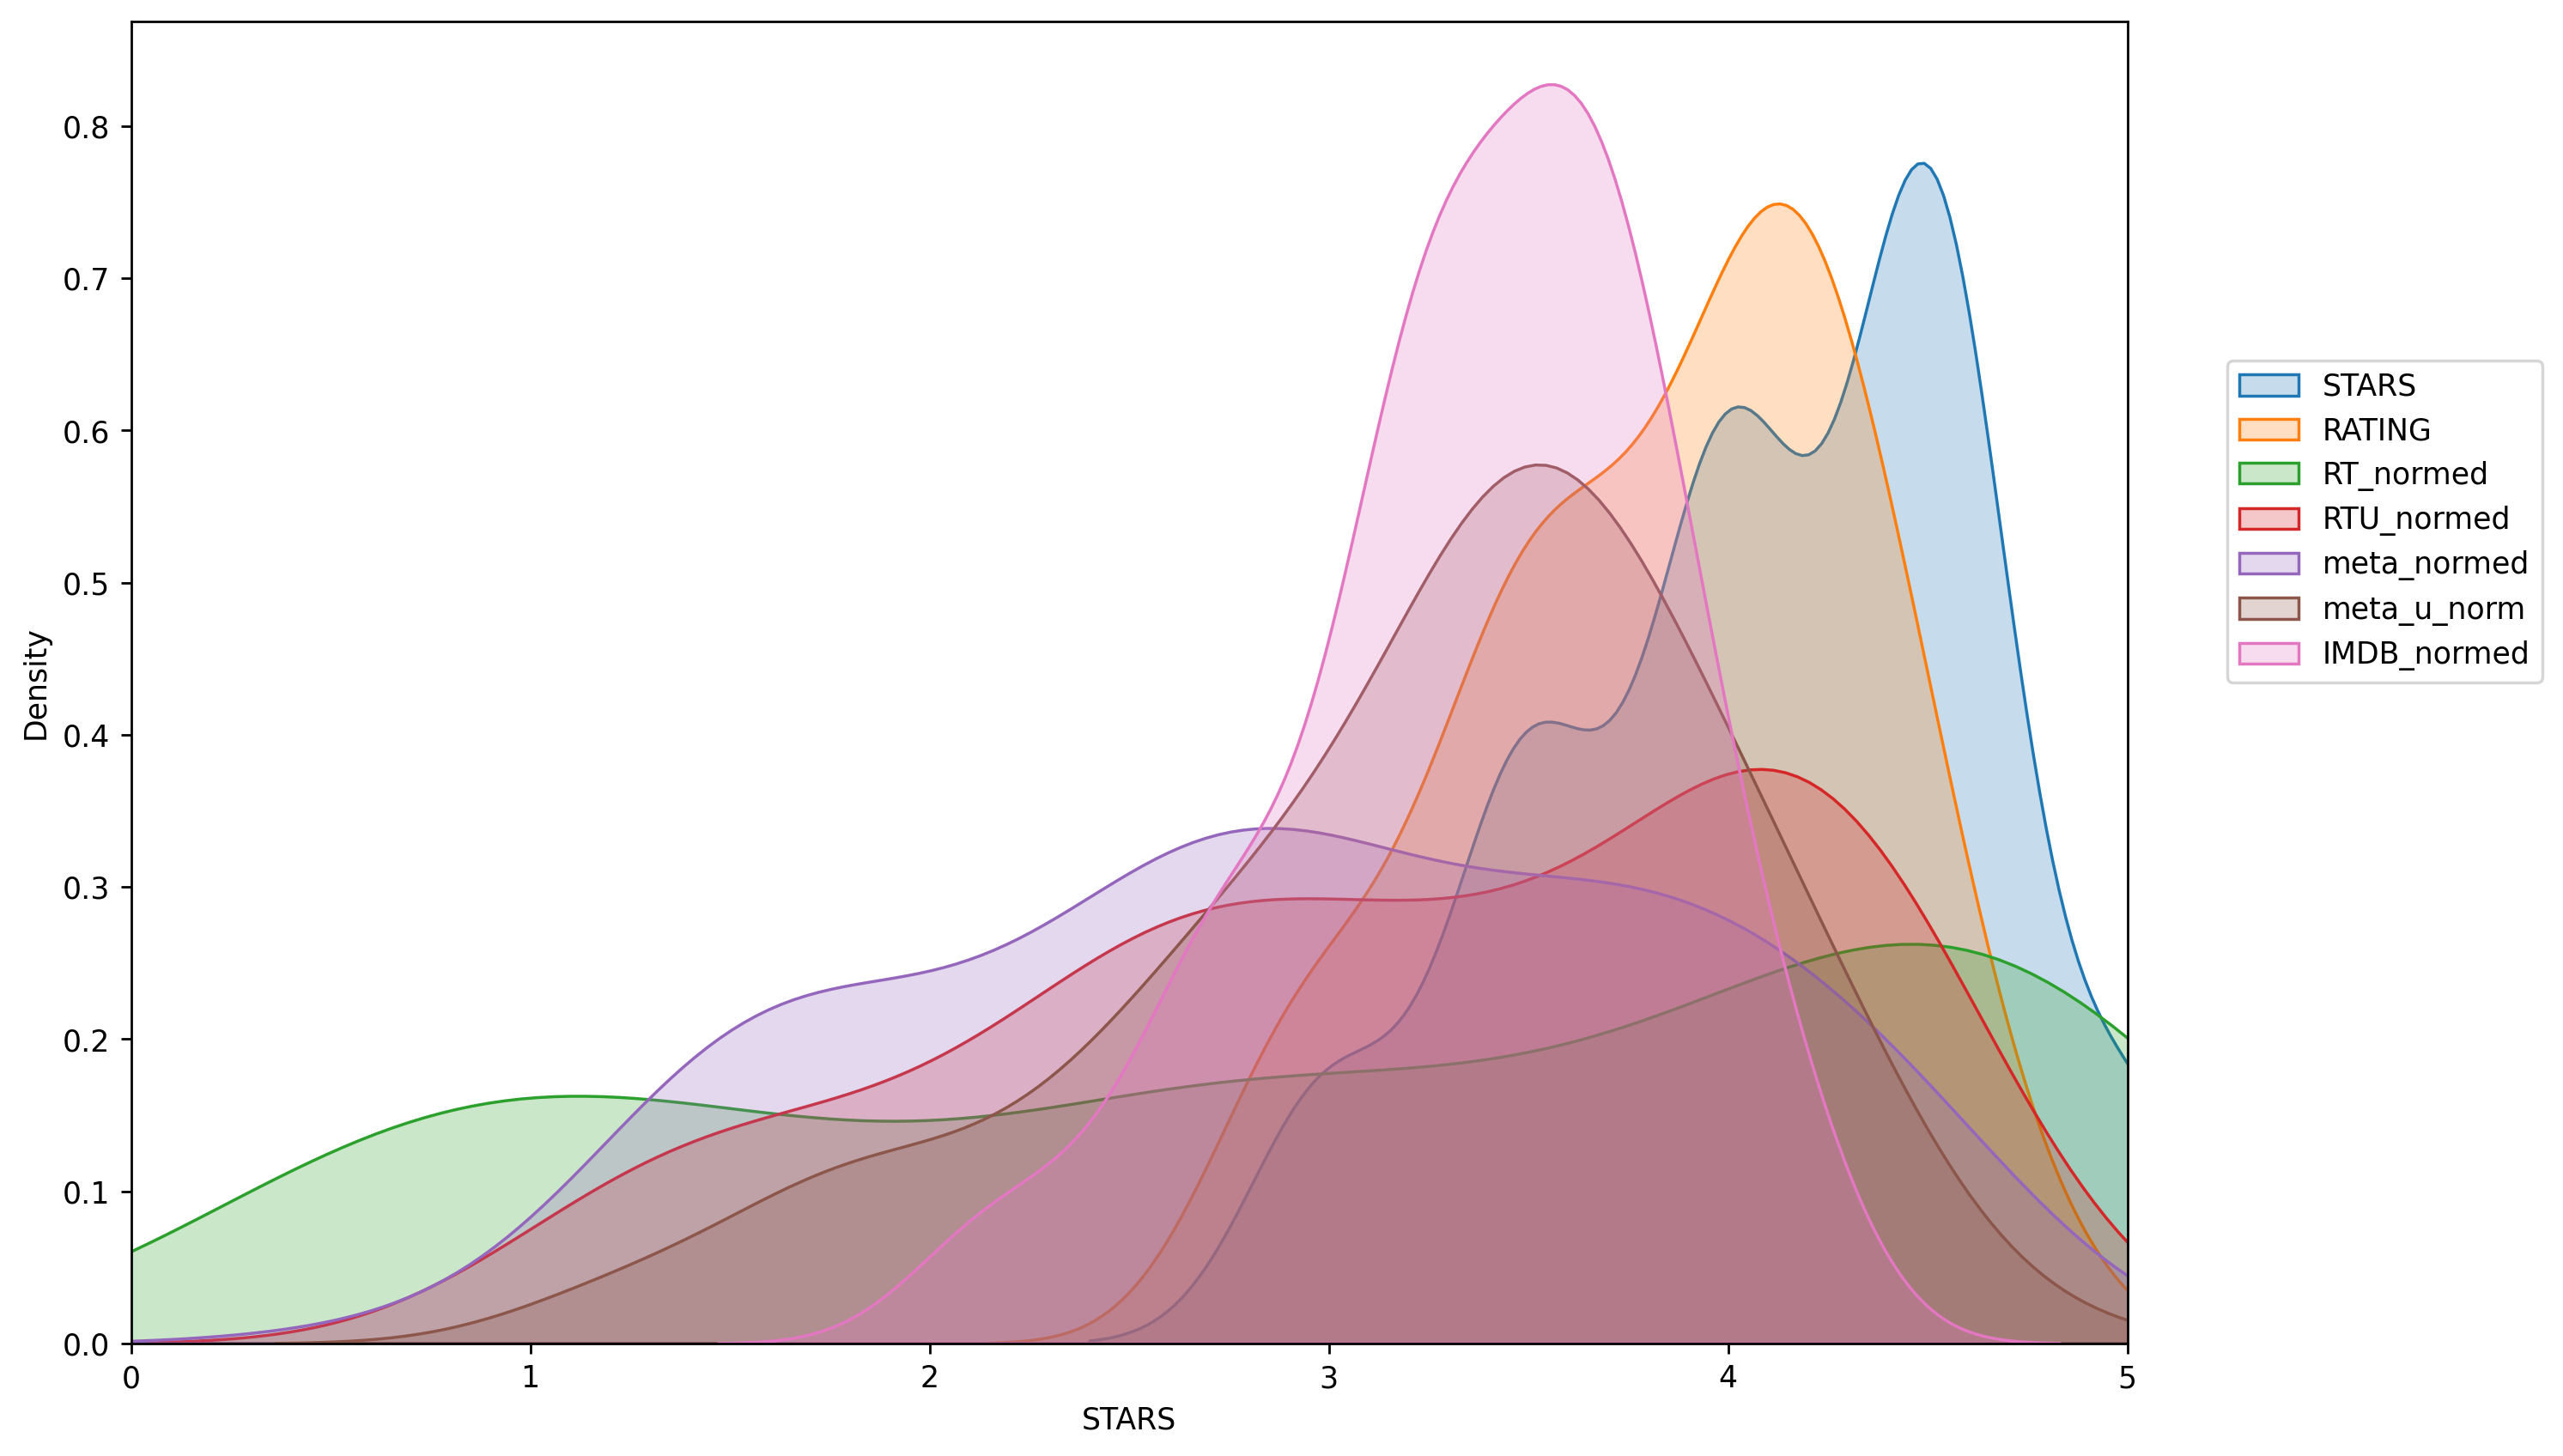

In [47]:
plt.figure(figsize=(12, 8), dpi=250)
sns.kdeplot(x='STARS', data=norm_scores, label='STARS', shade=True)
sns.kdeplot(x='RATING', data=norm_scores, label='RATING', shade=True)
sns.kdeplot(x='RT_normed', data=norm_scores, label='RT_normed', shade=True)
sns.kdeplot(x='RTU_normed', data=norm_scores, label='RTU_normed', shade=True)
sns.kdeplot(x='meta_normed', data=norm_scores, label='meta_normed', shade=True)
sns.kdeplot(x='meta_u_norm', data=norm_scores, label='meta_u_norm', shade=True)
sns.kdeplot(x='IMDB_normed', data=norm_scores, label='IMDB_normed', shade=True)
plt.xlim(0, 5)
plt.legend(loc=(1.05, .5));

**Мы сразу видим, что рейтинги Fandango очень сдвинуты справо. Интересно также, что рейтинги RT от критиков имеют очень пологое распределение. Давайте сравним только эти два распределения.** 

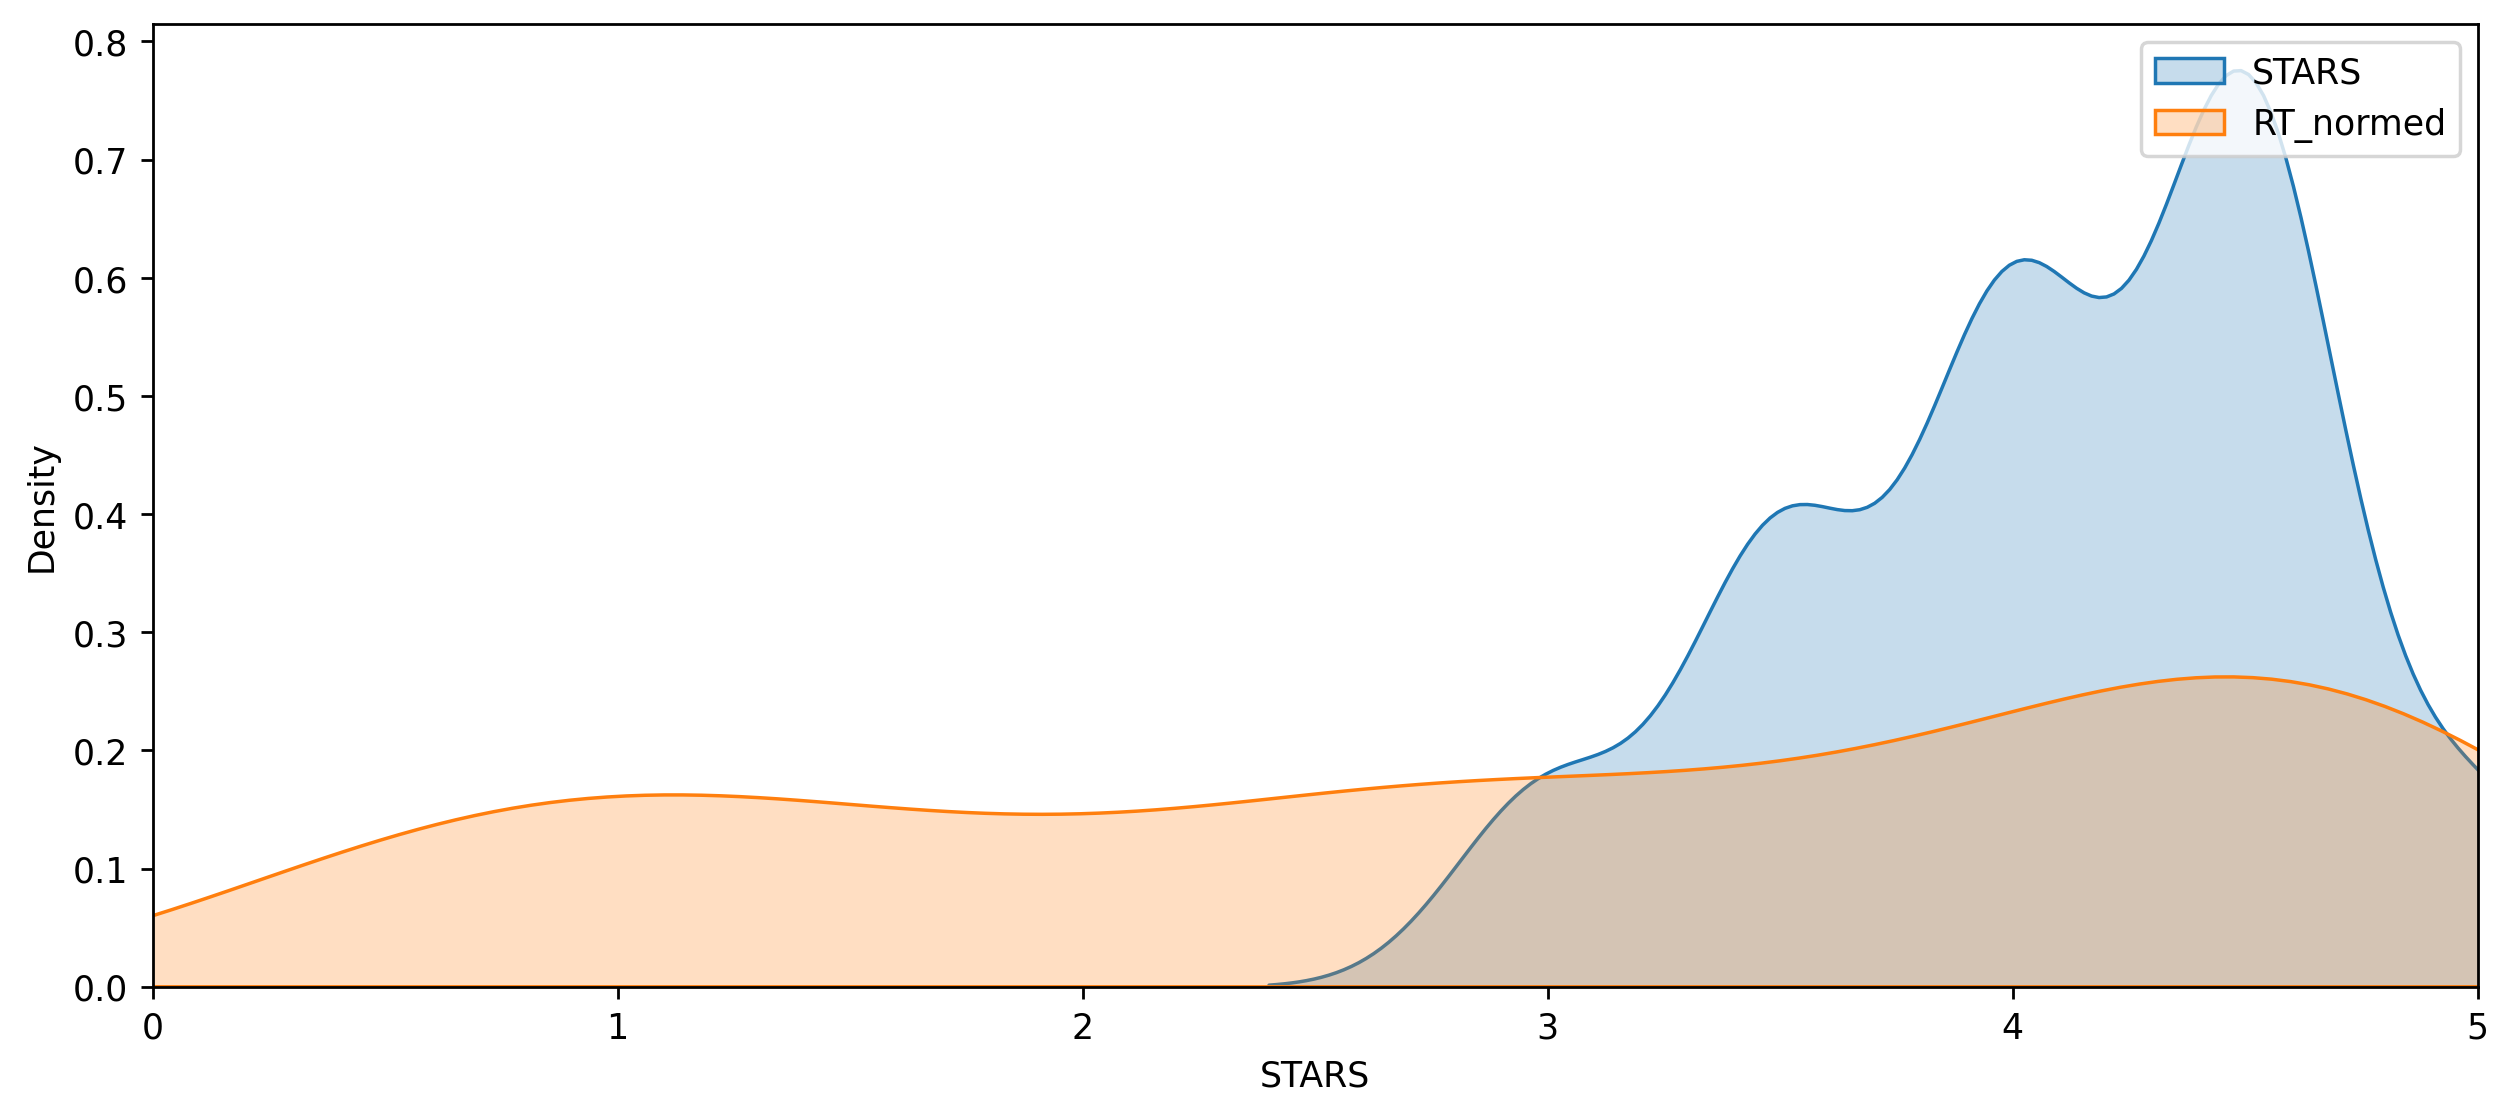

In [48]:
plt.figure(figsize=(12, 5), dpi=250)
sns.kdeplot(x='STARS', data=norm_scores, label='STARS', shade=True)
sns.kdeplot(x='RT_normed', data=norm_scores, label='RT_normed', shade=True)
plt.xlim(0, 5)
plt.legend();

**Нарисуем график histplot, сравнивающий все нормализованные рейтинги.**

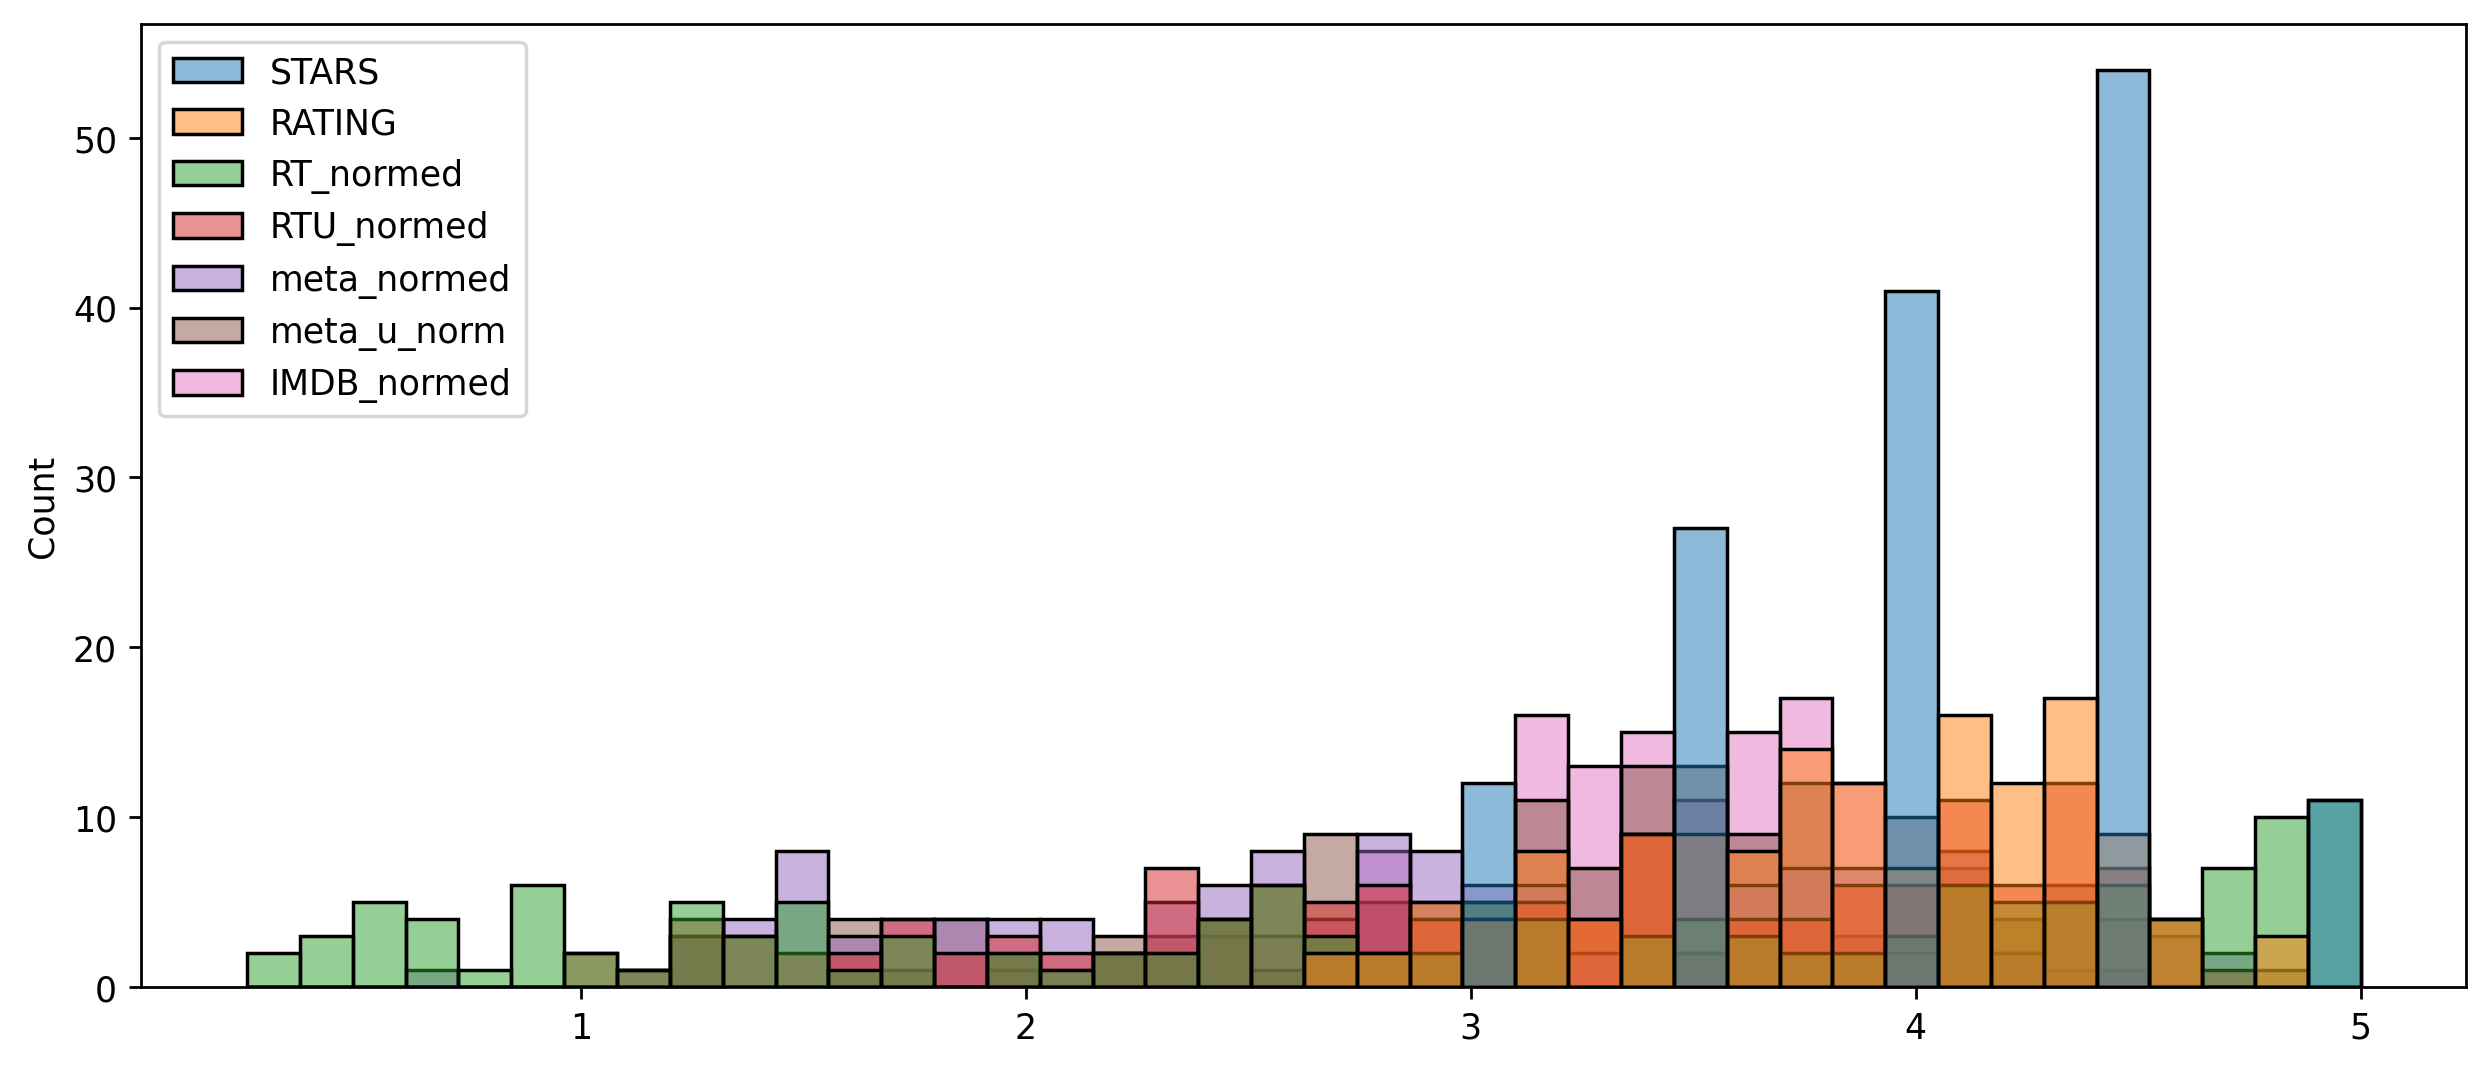

In [49]:
plt.figure(figsize=(12, 5), dpi=250)
sns.histplot(data=norm_scores, bins=40);

### Как различные компании оценивают фильмы с наименьшими рейтингами?

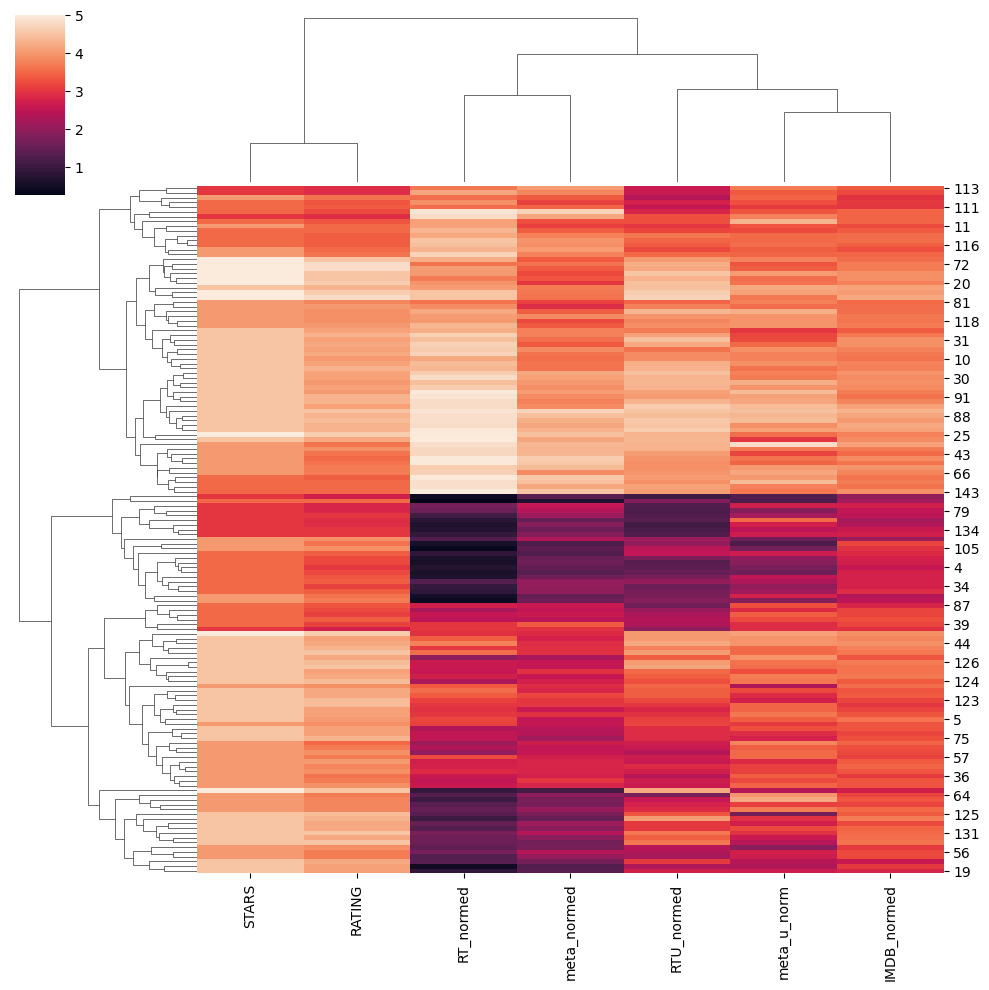

In [50]:
sns.clustermap(data=norm_scores);

**Давайте посмотрим на 10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic - какие это 10 фильмов? Какие нормализованные рейтинги дали этим фильмам другие компании?**

In [51]:
norm_scores_ = all_[['FILM', 'STARS', 'RATING',
        'RT_normed', 'RTU_normed', 'meta_normed', 'meta_u_norm',
       'IMDB_normed']]
norm_scores_ = norm_scores_.sort_values('RT_normed').head(10)

In [52]:
norm_scores_

,FILM,STARS,RATING,RT_normed,RTU_normed,meta_normed,meta_u_norm,IMDB_normed
132,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
105,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
53,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
48,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
15,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
33,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
35,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
60,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
59,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
58,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75


**Визуализируем распределение рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами.**

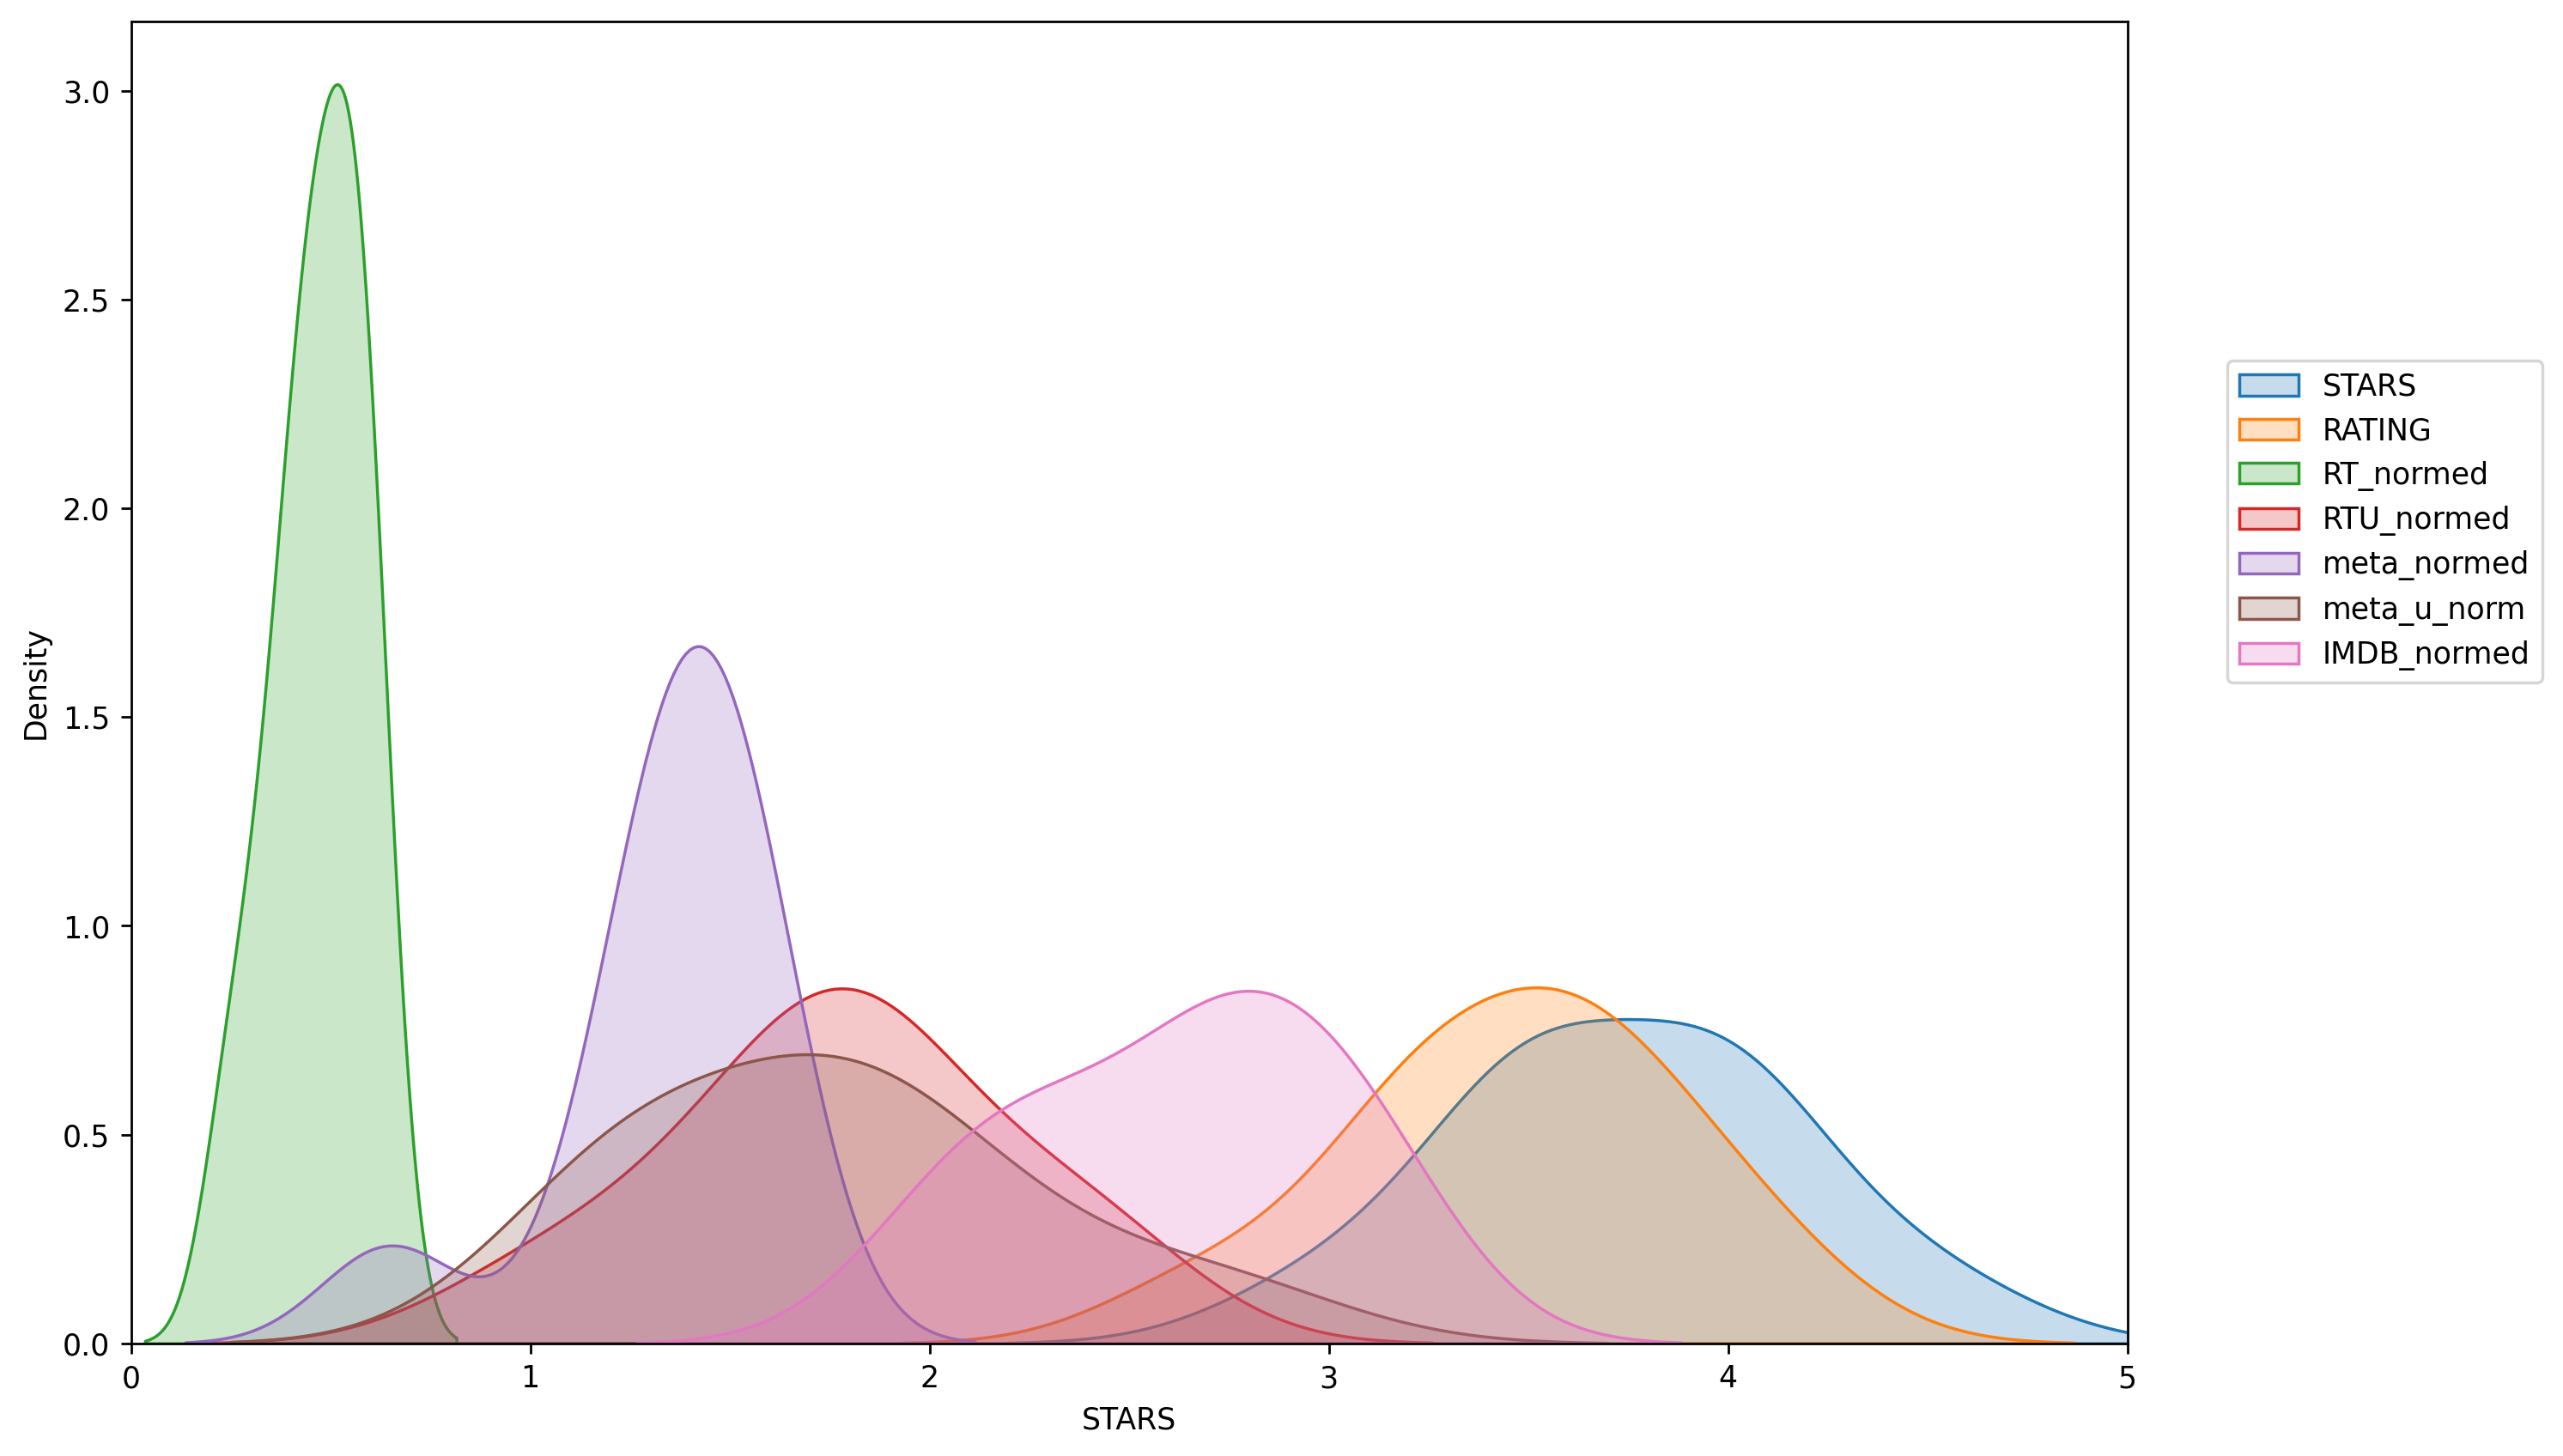

In [53]:
plt.figure(figsize=(12, 8), dpi=250)
sns.kdeplot(x='STARS', data=norm_scores_, label='STARS', shade=True)
sns.kdeplot(x='RATING', data=norm_scores_, label='RATING', shade=True)
sns.kdeplot(x='RT_normed', data=norm_scores_, label='RT_normed', shade=True)
sns.kdeplot(x='RTU_normed', data=norm_scores_, label='RTU_normed', shade=True)
sns.kdeplot(x='meta_normed', data=norm_scores_, label='meta_normed', shade=True)
sns.kdeplot(x='meta_u_norm', data=norm_scores_, label='meta_u_norm', shade=True)
sns.kdeplot(x='IMDB_normed', data=norm_scores_, label='IMDB_normed', shade=True)
plt.xlim(0, 5)
plt.legend(loc=(1.05, .5));


**Вывод: Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными.**  
    
**Больше всего отличается фильм [Taken 3!] - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний**